In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 


df = pd.read_csv('DatingAppReviewsDataset.csv')
df

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder
...,...,...,...,...,...,...,...
681989,52989,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,5,12-07-2017 01:44,Hinge
681990,52990,Brian Shook,I can't get past the initial set up. It won't...,1,11,12-07-2017 01:36,Hinge
681991,52991,A Google user,This is incredible! A quality dating app for A...,5,1,12-07-2017 01:32,Hinge
681992,52992,A Google user,"""Over Water"" ... Can't choose location.",2,8,12-07-2017 01:28,Hinge


In [4]:
df.columns

Index(['Unnamed: 0', 'Name', 'Review', 'Rating', '#ThumbsUp', 'Date&Time',
       'App'],
      dtype='object')

## Columns names in lower case

In [5]:
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['unnamed: 0', 'name', 'review', 'rating', '#thumbsup', 'date&time',
       'app'],
      dtype='object')

In [6]:
df.rating.unique()

array([5, 3, 1, 2, 4, 0])

In [7]:
df.app.unique()

array(['Tinder', 'Bumble', 'Hinge'], dtype=object)

In [27]:
df.thumbsup.unique()

array([   0,    1,    3,  149,   33,  299,   29,    2,   75,    5,   26,
          7,   43,   47,    4,   14,   82,   54,   24,   10,   61,   11,
         36,   81,   15,   42,   99,   21,  777,    6,   32,   12,   34,
         52,    9,   13,  347,   84,  395,   48,   46,   70,    8,  100,
        221,  129,  414,  548,   23,  137,   35,  346,   89,   17,   16,
         27,   67,   64,  131,   93,   19,   30,   25,   40,  248,  103,
         51,  130,   20,   56,  210,   74,  143,  300,   38,  405,  106,
        323,   39,   83,  922,  177,  174,  114,  183,   18,   91,  158,
        134,  527,  284,   87,  163,  420,   72,  184,  111,   62,   55,
        355,  631,   22,  235,  109,   59,  178,  172,  946,   85,  737,
         50,   79,   37,   31,   49,   95,  110,  640,  289,   92,  903,
        132,  448,   66,   73,  194,   76,  229,  182,  197,  545,  147,
        105, 1356,  224,  118,  486,   58,  156,   97,  202,  124,   44,
        212,  492,  952,  541,  273,  117,  121,  6

## Rename Columns

In [9]:
df = df.rename(columns={'#thumbsup': 'thumbsup'})

In [10]:
df.columns

Index(['unnamed: 0', 'name', 'review', 'rating', 'thumbsup', 'date&time',
       'app'],
      dtype='object')

In [13]:
df = df.drop(['unnamed: 0','name'], axis=1)

In [14]:
df 

,review,rating,thumbsup,date&time,app
0,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,Love it!,5,0,18-02-2022 01:06,Tinder
...,...,...,...,...,...
681989,Useless - I'm in the UK and it tells me i'm ov...,2,5,12-07-2017 01:44,Hinge
681990,I can't get past the initial set up. It won't...,1,11,12-07-2017 01:36,Hinge
681991,This is incredible! A quality dating app for A...,5,1,12-07-2017 01:32,Hinge
681992,"""Over Water"" ... Can't choose location.",2,8,12-07-2017 01:28,Hinge


## Split date and time column

In [19]:
df[['date', 'time']] = df['date&time'].str.split(' ', expand=True)
df = df.drop(['date&time'], axis=1)

In [20]:
df

,review,rating,thumbsup,app,date,time
0,On this app i cant find a partner,5,0,Tinder,18-02-2022,01:19
1,Tinder would be so much better if we could spe...,3,0,Tinder,18-02-2022,01:16
2,Still doesn't correctly notify matches or mess...,1,0,Tinder,18-02-2022,01:11
3,"Got banned because I updated my bio to say ""I ...",2,0,Tinder,18-02-2022,01:11
4,Love it!,5,0,Tinder,18-02-2022,01:06
...,...,...,...,...,...,...
681989,Useless - I'm in the UK and it tells me i'm ov...,2,5,Hinge,12-07-2017,01:44
681990,I can't get past the initial set up. It won't...,1,11,Hinge,12-07-2017,01:36
681991,This is incredible! A quality dating app for A...,5,1,Hinge,12-07-2017,01:32
681992,"""Over Water"" ... Can't choose location.",2,8,Hinge,12-07-2017,01:28


## Graphs

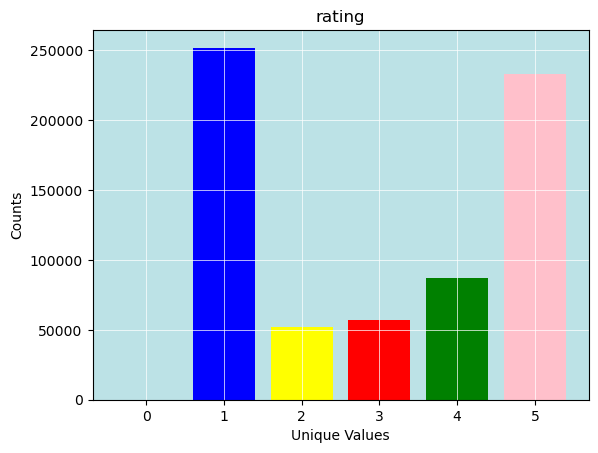

In [24]:
import matplotlib.pyplot as plt

value_counts = df['rating'].value_counts()
colors = ['blue', 'pink', 'green','red','yellow']

plt.bar(value_counts.index, value_counts.values, color=colors)
ax = plt.gca()  
ax.set_facecolor('#bce2e6')
plt.grid(color='white', linestyle='-', linewidth=0.5)



plt.title('rating')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
#ax.invert_xaxis()

plt.show()

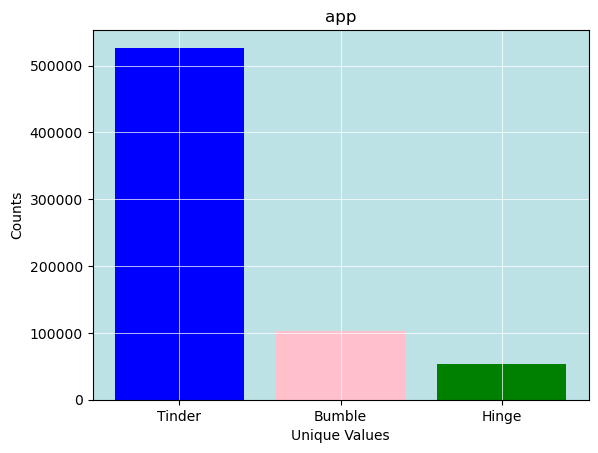

In [29]:
value_counts = df['app'].value_counts()
colors = ['blue', 'pink', 'green','red','yellow']

plt.bar(value_counts.index, value_counts.values, color=colors)
ax = plt.gca()  
ax.set_facecolor('#bce2e6')
plt.grid(color='white', linestyle='-', linewidth=0.5)



plt.title('app')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
#ax.invert_xaxis()

plt.show()